
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [2]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

W0712 23:26:10.998379 19184 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 23:26:11.025170 19184 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 23:26:11.029647 19184 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [3]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [4]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [5]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


'\nRMSprop- Arguments\nlr: float >= 0. Learning rate.\nrho: float >= 0.\nepsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().\ndecay: float >= 0. Learning rate decay over each update.\n'

batch_size：對總的樣本數進行分組，每組包含的樣本數量

epochs ：訓練次數
   
batch_size =120

epochs=10

### opt='adam'

In [7]:
# 第三步：編譯, 
opt='adam'
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

W0712 23:26:20.910243 19184 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 23:26:20.938022 19184 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0712 23:26:20.944966 19184 deprecation.py:323] From C:\Users\Rosa\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [9]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size =120
epochs=10

In [10]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

W0712 23:26:26.420824 19184 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 15s - loss: 2.8717 - acc: 0.8207 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 2/10
 - 14s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 3/10
 - 14s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 4/10
 - 14s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 5/10
 - 14s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 6/10
 - 15s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 7/10
 - 15s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 8/10
 - 14s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 9/10
 - 16s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 10/10
 - 14s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193


In [11]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8989080715179445, 0.8191599416732788]

 The accuracy of the model is 0.095800 


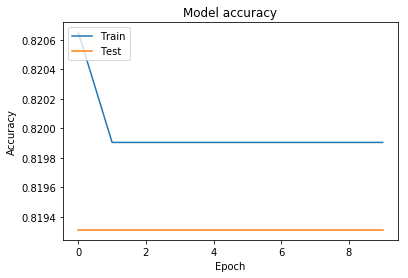

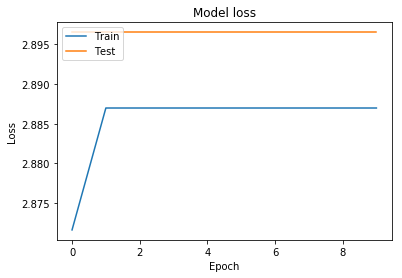

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### opt='SGD'

In [18]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

# 第三步：編譯, 
opt='SGD'
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

batch_size =120
epochs=10

# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 10s - loss: 2.8778 - acc: 0.8200 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 2/10
 - 9s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 3/10
 - 9s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 4/10
 - 9s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 5/10
 - 8s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 6/10
 - 8s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 7/10
 - 8s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 8/10
 - 8s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 9/10
 - 9s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 10/10
 - 9s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
 test set 

 The test loss is %f  [2.8918151903152465, 0.8195999419689178]

 The accuracy of the model is 0.098000 


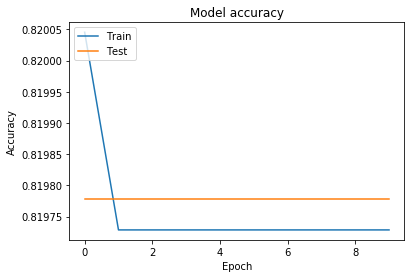

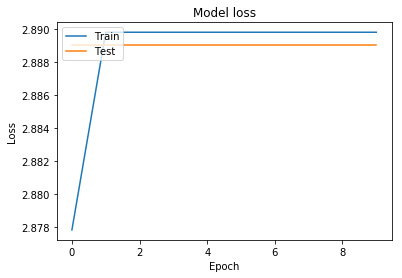

In [19]:
# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### opt='RMSprop'

In [20]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

# 第三步：編譯, 
opt='RMSprop'
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

batch_size =120
epochs=10

# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 12s - loss: 2.8400 - acc: 0.8227 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 2/10
 - 11s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 3/10
 - 11s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 4/10
 - 11s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 5/10
 - 11s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 6/10
 - 11s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 7/10
 - 11s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 8/10
 - 11s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 9/10
 - 12s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 10/10
 - 11s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
 test set 

 The test loss is %f  [2.8421609878540037, 0.8226999413967132]

 The accuracy of the model is 0.1

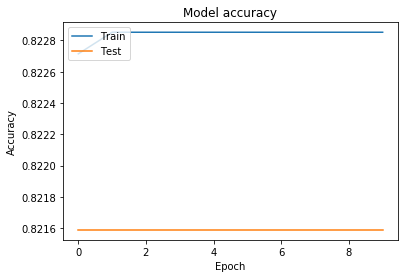

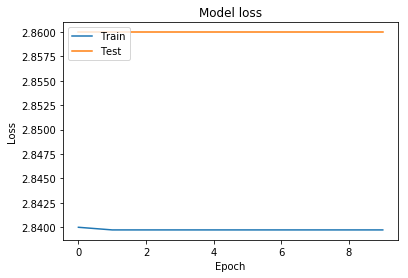

In [21]:
# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 觀察結果
- 設定：batch_size(對總的樣本數進行分組，每組包含的樣本數量)=120；epochs(訓練次數)=10
- 分別驗證 Adam,SGD, Rmsprop 的 accurancy
- Accurancy結果如下：
    - Adam=0.095800 
    - SGD=0.098000 
    - Rmsprop=0.113500 

#### 模型的預測結果：SGD>Adam>Rmsprop